In [3]:
import sqlite3
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
dominance_df = pd.read_excel('Hand Dominance.xlsx', 'Hand Dominance', index_col=None, na_values=['NA'])

In [ ]:
dominance_df.head()

In [ ]:
dominance_df.to_sql("dominance_table", sqlite3.connect("hands.db"), if_exists = "replace")

In [5]:
conn=sqlite3.connect('hands.db')

In [6]:
avg_ppg_by_dominance = pd.read_sql_query("SELECT AVG(`PTS PG`) as AVG_PPG, Dominance FROM dominance_table GROUP BY Dominance;", conn)

In [8]:
percentage_of_each_hand = pd.read_sql_query("SELECT COUNT(Dominance) FROM dominance_table GROUP BY Dominance", conn)

In [9]:
# NOTE: Make sure to use back tick or else query might not work.
percentage_of_each_hand.head()

,COUNT(Dominance)
0,554
1,335


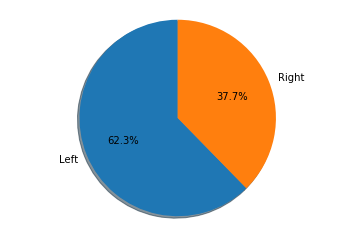

In [10]:
labels = "Left", "Right"

fig1, ax1 = plt.subplots()
ax1.pie(percentage_of_each_hand, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Text(0.5, 1.0, 'Points by Hand Dominance')

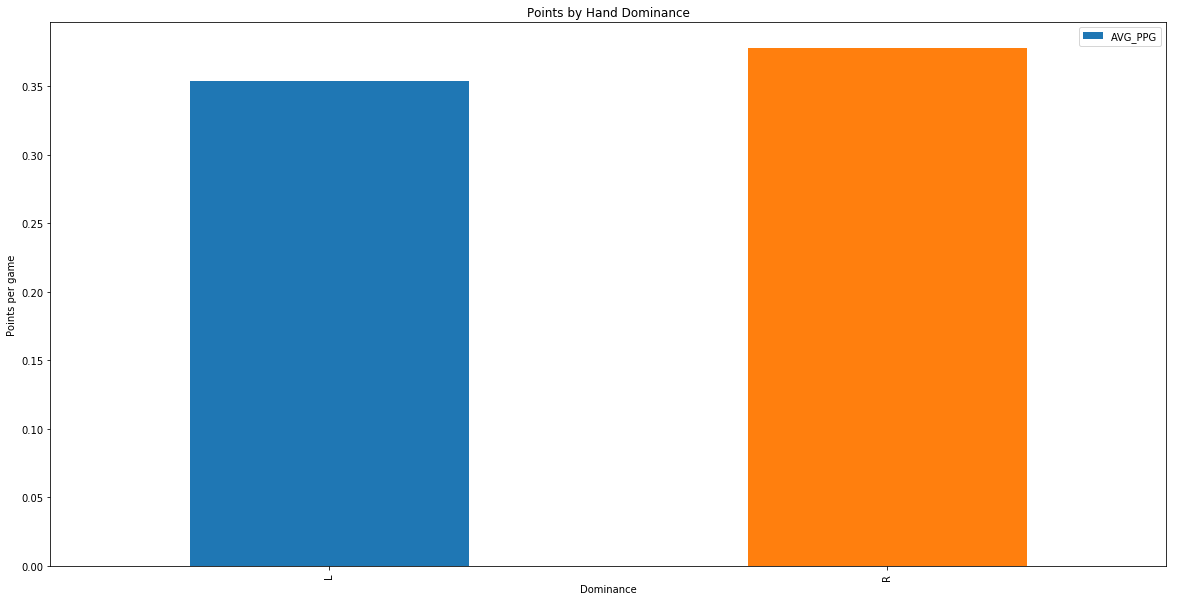

In [11]:
avg_ppg_by_dominance.plot(x="Dominance", y="AVG_PPG", kind='bar', figsize=(20,10))
plt.ylabel("Points per game")
plt.title("Points by Hand Dominance")